# Import the libraries

In [79]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a new Graph
### Starting from a graph with 1000 nodes and no links, add links randomly, one at a time, until your graph has a connected component that comprises at least 501 nodes. 
### What is the value of <k> at this point?

First, I will demonstrate the average grade for just one network with a thousand nodes.

In [80]:
G = nx.Graph()
thousand_nodes_list = [x for x in range(1000)]
G.add_nodes_from(thousand_nodes_list)
already_list = []
num_edges = 0
while len(max(nx.connected_components(G), key=len)) <= 501:
  node_a = random.randint(0, 999)
  node_b = random.randint(0, 999)
  if (node_a,node_b) not in already_list:
    already_list.append((node_a,node_b))
    G.add_edge(node_a, node_b)
    num_edges = num_edges + 1

degrees = G.degree()
degree_values =  [v for k, v in degrees]
average_degree = sum(degree_values)/len(degree_values)
average_degree

1.382

### To prove the result obtained, we can compare with the result expected by the formula $<k> = 2 * L / N$

In [81]:
average_degree_form = (2*len(G.edges()))/len(G.nodes)
average_degree_form

1.382

.

# Repeat the experiment 50 times, and plot the distributiion of <k> values.

To make it easier, I created a method that returns the average degree of a thousand-node random network, based on the code above.

In [82]:
def average_degree_from_random_thousand_network():
  G = nx.Graph()
  thousand_nodes_list = [x for x in range(1000)]
  G.add_nodes_from(thousand_nodes_list)
  already_list = []
  num_edges = 0
  while len(max(nx.connected_components(G), key=len)) <= 501:
    node_a = random.randint(0, 999)
    node_b = random.randint(0, 999)
    if (node_a,node_b) not in already_list:
      already_list.append((node_a,node_b))
      G.add_edge(node_a, node_b)
      num_edges = num_edges + 1

  degrees = G.degree()
  degree_values =  [v for k, v in degrees]
  average_degree = sum(degree_values)/len(degree_values)
  return average_degree

Call the method 50 times and save the average degrees

In [83]:
average_degree_list = []
for i in range(50):
  average_degree_list.append(average_degree_from_random_thousand_network())

### Average Degree List and size:

In [90]:
print(average_degree_list)
print(f'Size of Average Degree List: {len(average_degree_list)}')

[1.332, 1.308, 1.404, 1.43, 1.412, 1.388, 1.342, 1.418, 1.466, 1.424, 1.36, 1.404, 1.402, 1.34, 1.422, 1.402, 1.424, 1.406, 1.48, 1.444, 1.43, 1.412, 1.422, 1.364, 1.4, 1.396, 1.416, 1.374, 1.5, 1.394, 1.366, 1.33, 1.4, 1.438, 1.392, 1.38, 1.382, 1.44, 1.394, 1.386, 1.372, 1.416, 1.35, 1.38, 1.38, 1.372, 1.382, 1.48, 1.338, 1.42]
Size of Average Degree List: 50


.

### Average Degree Distribution:

Average Degree Distribution


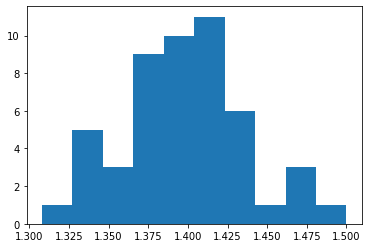

In [84]:
plt.hist(average_degree_list)
print("Average Degree Distribution")